# Production economy with externalities

In [81]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from model_project import ProductionEconomyWithExternalityClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Economic Model Description with Externalities

Consider an economy consisting of $N_w$ **workers**, $N_c$ **capitalists**, and a single **firm** owned equally by the capitalists. This economy now includes a pollution externality from production.

### Workers:
**Workers:** Consume, $c_w$, at a price $p$, and supply labor, $\ell_w$, at a wage of $w$. Maximize utility:

$$
\max_{c_w\geq0,\ell_w\in[0,1]} \log (c_w+\kappa)- \omega \ell_w^{\eta} - \theta P(\ell) \text{ s.t. } pc_w \leq w \ell_w,\,\,\,\omega,\kappa, \theta > 0, \eta \geq 1, \delta, \beta > 0
$$

where $P(\ell) = \delta \ell^\beta$ is the pollution function dependent on total labor $\ell$. Equivalently, substituting in the budget constraint with equality:

$$
\max_{\ell_w\in[0,1]} \log \left( \frac{w \ell_w}{p}+\kappa \right)- \omega \ell_w^{\eta} - \theta P(\ell)
$$

Denote ***optimal behavior*** $c_w^{\star}(p,w)$ and $\ell_w^{\star}(p,w)$.

### Capitalists:
**Capitalists:** Consume, $c_c$, at a price $p$, supply labor, $\ell_c$, at a wage of $w$, and receive profits $\pi$. Maximize utility:

$$
\max_{c_c\geq0,\ell_c\in[0,1]} \log (c_c+\kappa) - \omega \ell_c^{\eta} - \theta P(\ell) \text{ s.t. } pc_c \leq w \ell_c + \pi,\,\,\,\omega,\kappa, \theta > 0, \eta \geq 1, \delta, \beta > 0
$$

Equivalently, substituting in the budget constraint with equality:

$$
\max_{\ell_c\in[0,1]} \log \left( \frac{w \ell_c + \pi}{p}+\kappa \right)- \omega \ell_c^{\eta} - \theta P(\ell)
$$

Denote ***optimal behavior*** $c_c^{\star}(p,w,\pi)$ and $\ell_c^{\star}(p,w,\pi)$.

### Firm:
**Firm:** Uses the production function $f(\ell) = \ell^\alpha, \alpha \in (0,1)$. Maximize profits:

$$
\max_{\ell\geq0} p f(\ell) - w\ell 
$$

Denote ***optional behavior*** by $\ell^{\star}(p,w)$.

Implied ***production*** is $y^{\star}(p,w) = f(\ell^{\star}(p,w))$ and implied ***total profits*** are $\Pi^\star(p,w) = py^{\star}(p,w) - w\ell^{\star}(p,w)$.

### Equilibrium:
An equilibrium is a set of prices $(p,w)$ such that workers, capitalists, and the firm act optimally given prices and profit, and:

1. **Goods market clears**: $N_w c_w^{\star}(p,w) + N_c c_c^{\star}(p,w,\pi) = y^\star(p,w)$
2. **Labor market clears**: $N_w \ell_w^{\star}(p,w) + N_c \ell_c^{\star}(p,w,\pi) = \ell^\star(p,w)$
3. **Profits received equal profits distributed**: $\pi = \frac{py^{\star}(p,w) - w\ell^{\star}(p,w)}{N_c}$

**Note I:** We can use $p=1$ as numeraire.

**Note II:** *Walras' Law* implies that if one of the markets clears, then the other one does too.


### Looking at the economy without polution (setting $\delta$ = 0)

First we want to find the equlibrium in the case without polution so we have something to compare to the equlibrium we find with polution. We do this by setting $\delta$ = 0. We find the equlibrium with an optimizer instead of gridsearch so we have an exact solution. We see that without polution the and the rest of the parameters fixed that the workers have a utility of -2.27 and capitalists have a utility og -0.03. 

In [82]:
economy = ProductionEconomyWithExternalityClass()
economy.par.delta = 0  # Set delta to 0 to eliminate pollution effects
economy.find_equilibrium()



workers      : c = 0.0004, l = 0.0044, u = -2.3011
capitalists  : c =    inf, l = 1.0000, u =     inf
goods market : nan
labor market : -24.99587251
total pollution: 0.0000


### Looking at the economy with polution (setting $\delta$ = 0.2)

Now we run the economy agian but with poluttion. Remeber that this pollution affects both the workers and the capitalists negatively. We see that the uitily is lower for both the workers and the capitalists but it is relatively much lower for the capitalist. In relative terms the utility falls with .4 pct. for workers and 220.4 pct. for capitalists. Our guess is that is due the numbers of capitalists and workers arent the same, so we try to do the same experiment but this with 10 workers and 10 capitalists

In [83]:
economy = ProductionEconomyWithExternalityClass()
economy.par.delta = 0.2
economy.find_equilibrium()

workers      : c = 0.0000, l = 0.0000, u = -2.3026
capitalists  : c =    inf, l = 1.0000, u =     inf
goods market : nan
labor market : -24.99587251
total pollution: 0.0000


### Exploring how the polution affects workers and capitalists differently

We now run the economy twice one with polution and one without but this time with 10 workers and 10 capitalists. We see now that the difference in utility that the pollution gives is 2.1887-2.2035=-0.0148 for workers and 1.8505-1.8748=-0,0243. In relative terms the utility falls with .7 pct. for workers and 1.3 pct. for capitalist. This gives the indicaiton that there exists a reltive number between workers and capitlists where the introduciton of pollution will affect their utility equaly 

In [84]:
economy = ProductionEconomyWithExternalityClass()
economy.par.delta = 0  # Set delta to 0 to eliminate pollution effects
economy.par.Nw = 10 
economy.par.Nc = 10 
economy.find_equilibrium()

workers      : c = 0.0314, l = 0.0634, u = -2.1887
capitalists  : c = 0.0693, l = 0.0382, u = -1.8505
goods market : -0.00000003
labor market : -0.00000006
total pollution: 0.0000


In [85]:
economy = ProductionEconomyWithExternalityClass()
economy.par.delta = 0.2 
economy.par.Nw = 10 
economy.par.Nc = 10 
economy.find_equilibrium()

workers      : c = 0.0307, l = 0.0593, u = -2.2035
capitalists  : c = 0.0659, l = 0.0341, u = -1.8748
goods market : 0.00000001
labor market : 0.00000002
total pollution: 0.1900


### Trying to find the relative numbers of workers and capitlists which ensures that the introduciton of pollution will affect their utility equally

In [86]:
def run_simulation(delta):
    economy = ProductionEconomyWithExternalityClass()
    economy.par.delta = delta

    num_workers = []
    utility_w_workers = []
    utility_c_workers = []

    for N in range(1, 101):
        economy.par.Nw = N
        economy.par.Nc = N
        economy.find_equilibrium()

        num_workers.append(N)
        utility_w_workers.append(economy.sol.utility_w)
        utility_c_workers.append(economy.sol.utility_c)

    return num_workers, utility_w_workers, utility_c_workers



workers      : c = 0.1415, l = 0.1151, u = -1.8115
capitalists  : c = 0.2653, l = 0.0503, u = -1.1201
goods market : 0.00000000
labor market : 0.00000000
total pollution: 0.0000
workers      : c = 0.0925, l = 0.1009, u = -1.9679
capitalists  : c = 0.1800, l = 0.0477, u = -1.3770
goods market : 0.00000000
labor market : 0.00000000
total pollution: 0.0000
workers      : c = 0.0714, l = 0.0917, u = -2.0415
capitalists  : c = 0.1427, l = 0.0458, u = -1.5140
goods market : 0.00000001
labor market : 0.00000001
total pollution: 0.0000
workers      : c = 0.0591, l = 0.0850, u = -2.0859
capitalists  : c = 0.1206, l = 0.0442, u = -1.6044
goods market : 0.00000000
labor market : 0.00000000
total pollution: 0.0000
workers      : c = 0.0509, l = 0.0797, u = -2.1161
capitalists  : c = 0.1057, l = 0.0429, u = -1.6703
goods market : 0.00000001
labor market : 0.00000001
total pollution: 0.0000
workers      : c = 0.0449, l = 0.0753, u = -2.1381
capitalists  : c = 0.0947, l = 0.0417, u = -1.7214
goods ma

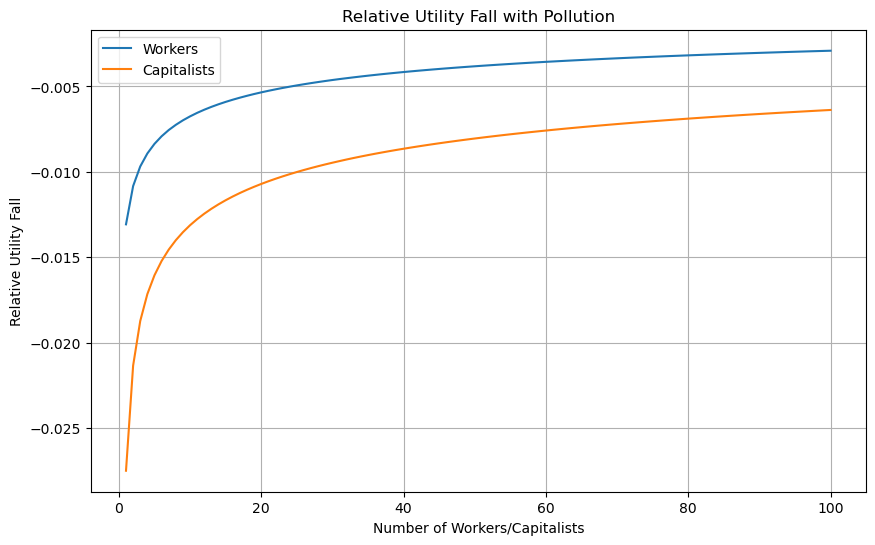

In [87]:
# Run simulations for delta=0 and delta=0.2
num_workers, utility_w_workers_0, utility_c_workers_0 = run_simulation(0)
_, utility_w_workers_02, utility_c_workers_02 = run_simulation(0.2)

# Calculate relative utility fall for workers and capitalists
relative_utility_w_workers = [(uw - uw_02) / uw for uw, uw_02 in zip(utility_w_workers_0, utility_w_workers_02)]
relative_utility_c_workers = [(uc - uc_02) / uc for uc, uc_02 in zip(utility_c_workers_0, utility_c_workers_02)]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_workers, relative_utility_w_workers, label='Workers')
plt.plot(num_workers, relative_utility_c_workers, label='Capitalists')
plt.title('Relative Utility Fall with Pollution')
plt.xlabel('Number of Workers/Capitalists')
plt.ylabel('Relative Utility Fall')
plt.legend()
plt.grid(True)
plt.show()

As the plot show the relative fall in utility will actualy never be able to become the same for workers and capitalists. This must be due the fact that the workers only gain consumption from their wage but capitalists both get from profit and wage. This means that when the pollution is introduced both groups will work less which can be seen in the orginal case. This will affect only affect the workers income in the form of wage but for the capitalist both the profit and the wage is affect, why they will allways have a relative lower utitlity with pollution compared to workers. Furhter more when the workers reduce their labor it also affects the profit which only makes this effect stronger. This is also why that in the case where there are few workers per capitalits the gap between relative loss in utility from introducing pollution is greater that the opistie case.